In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [22]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

11490434/11490434 [==============================] - 0s 0us/step


In [26]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


In [28]:
# Build the Convolutional Neural Network (CNN) model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [30]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 54s 70ms/step - loss: 0.2149 - accuracy: 0.9356 - val_loss: 0.0779 - val_accuracy: 0.9773
Epoch 2/5
750/750 [==============================] - 48s 64ms/step - loss: 0.0586 - accuracy: 0.9819 - val_loss: 0.0548 - val_accuracy: 0.9841
Epoch 3/5
750/750 [==============================] - 43s 58ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0439 - val_accuracy: 0.9867
Epoch 4/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0312 - accuracy: 0.9897 - val_loss: 0.0400 - val_accuracy: 0.9879
Epoch 5/5
750/750 [==============================] - 46s 61ms/step - loss: 0.0250 - accuracy: 0.9919 - val_loss: 0.0412 - val_accuracy: 0.9872


In [32]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0341 - accuracy: 0.9890
Test accuracy: 0.9890


In [33]:
# Predictions on a few test samples
predictions = model.predict(test_images[:5])
predicted_labels = tf.argmax(predictions, axis=1)

1/1 [==============================] - 0s 88ms/step


In [34]:
# Display the predictions
print(f"Predicted labels: {predicted_labels.numpy()}")
print(f"True labels:      {tf.argmax(test_labels[:5], axis=1).numpy()}")

Predicted labels: [7 2 1 0 4]
True labels:      [7 2 1 0 4]


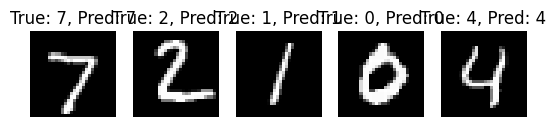

In [35]:
# Display the test images and their true labels
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i, :, :, 0], cmap='gray')
    plt.title(f'True: {tf.argmax(test_labels[i]).numpy()}, Pred: {predicted_labels[i].numpy()}')
    plt.axis('off')
plt.show()
